In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
df = pd.read_parquet(r'C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet')

In [3]:
df.head()

,id,cleanedContent,label,category,emotion_label,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq,date,...,probability.positive,probability.anger,probability.anticipation,probability.fear,probability.joy,probability.optimism,probability.sadness,Normalized_sentiment_score,emotion_score,Normalized_emotion_score
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South,fear,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...,2020-05-06 11:07:40+00:00,...,0.009977,0.279881,0.004095,0.352227,0.000745,0.003695,0.359357,-0.850836,0.112473,-0.776131
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South,anger,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,take day arrest gregorymcmichael travismcmicha...,2020-05-08 10:31:49+00:00,...,0.005212,0.796906,0.005784,0.159391,0.000317,0.000924,0.036677,-0.830837,0.027131,-0.947731
12,1260986640148955136,TN is already starting. They say that #COVID19...,negative,African American South,anger,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...,2020-05-14 17:33:37+00:00,...,0.158500,0.810908,0.010574,0.014736,0.002848,0.137127,0.023808,-0.345149,0.110358,-0.780384
20,1265664683941474309,5) I pledge that I will keep myself aware of w...,neutral,African American South,optimism,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...,2020-05-27 15:22:30+00:00,...,0.211579,0.013011,0.030190,0.004790,0.005827,0.929707,0.016474,0.029040,0.675491,0.355940
28,1265698571053142016,"@user Many may not know me, but I am a progres...",positive,African American South,optimism,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn ubi end citi...,2020-05-27 17:37:09+00:00,...,0.887606,0.007553,0.072251,0.001653,0.069170,0.847429,0.001945,0.888683,0.699050,0.403310


In [4]:
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags

# Apply the function to the column
df['hashtags_list'] = df['rawContent'].apply(extract_hashtags)

In [45]:
df2 = df[df['emotion_label'] == 'optimism']

In [46]:
all_hashtags = [tag for tags in df2['hashtags_list'] for tag in tags]

In [47]:
words_to_remove = ['#snl', '#regalmovies', '#imax', '#ibmwatsonhello', '#narcos', '#narcosmexico', '#IMAXRegalSweeps', '#bansurgicalsterilization', '#KeepWYWyld', '#ItsWy', '#LeavePlantationSaveDemocracy', '#keepwildhorseswild', '#wildhorses', '#oilandgas', '#SageGrouse', '#SaveGrouse']

In [48]:
filtered_list = [word for word in all_hashtags if word not in words_to_remove]

In [49]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=250,max_words=80,collocations=False, background_color='black').generate(' '.join(filtered_list))

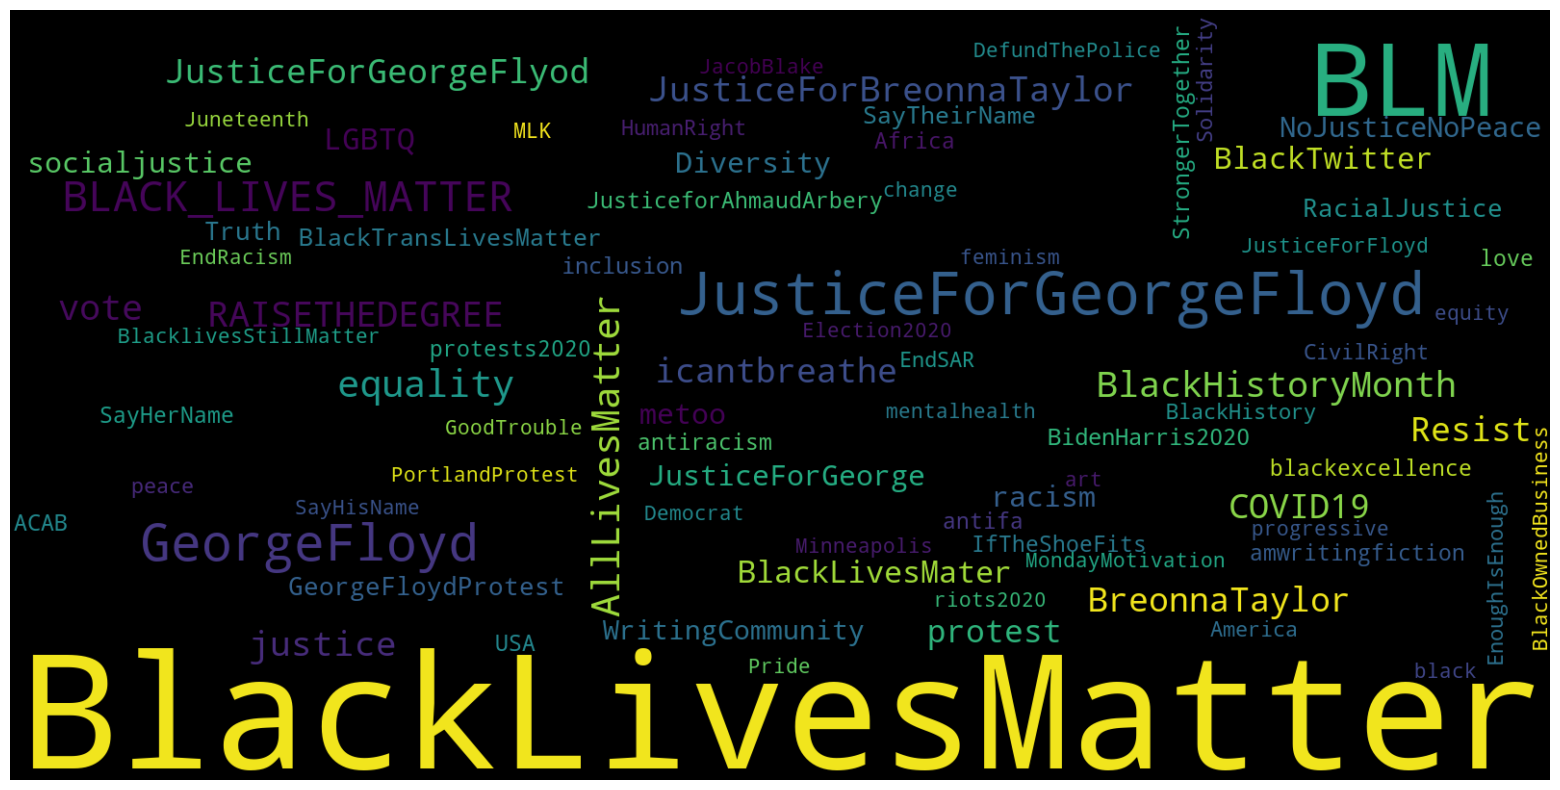

In [50]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()